Zadanie 1

In [1]:
import matplotlib.pyplot as plt
import time 

In [2]:
v = 0.5312511
n = 10000000 #10**7
correctSum = n*v

T = [v for _ in range(n)]

In [3]:
def calculate_errors(predictedValue, correctValue):
    absoluteErr = abs(predictedValue - correctValue)
    relativeErr = absoluteErr / correctValue

    return absoluteErr, relativeErr

In [4]:
def simpleSum(T):
    sumT = 0

    absoluteErr = 0
    relativeErr = 0

    plotArr = []

    for i in range(len(T)):

        sumT += T[i]

        # reports values of errors every 25000 iterations
        if ((i + 1) % 25000 == 0):
            correctVal = (i+1) * v

            x = calculate_errors(sumT, correctVal)
            absoluteErr = x[0] 
            relativeErr = x[1]

            plotArr.append(relativeErr*100)


    plt.plot(plotArr)
    plt.title("Relative Error")
    plt.show()
    return sumT

In [5]:
def rec(T, p, r):

    if p > r:
        return 0
    if p == r:
        return T[p]
    return rec(T, p, p + (r-p) // 2) + rec(T, p + (r-p) // 2+1, r)

def calcSumRecursivly(T):
    return rec(T,0, len(T)-1)

correct value= 5312511.0 



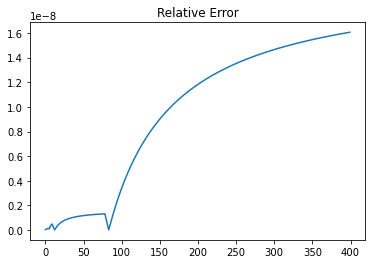

simple summing time: 2.0490808486938477 

recursive sum time: 4.574693918228149 

iteration result= 5312510.99914665 
errors (absolute, relative): (0.0008533503860235214, 1.606303282992772e-10) 

recursive result= 5312510.999999999 
errors  (absolute, relative): (9.313225746154785e-10, 1.7530741576167627e-16) 



In [6]:
def zad1():

    print("correct value=" , correctSum, "\n")

    start = time.time()
    sumOfArr = simpleSum(T)
    end = time.time()
    print("simple summing time:", end-start, "\n")



    start = time.time()
    recSumOfArr = rec(T, 0, n-1)
    end = time.time()
    print("recursive sum time:", end-start, "\n")


    print('iteration result=',sumOfArr, "\nerrors (absolute, relative):", \
         calculate_errors(sumOfArr, correctSum), "\n")

    print('recursive result=',recSumOfArr, "\nerrors  (absolute, relative):", \
          calculate_errors(recSumOfArr, correctSum), "\n" )

zad1()




Błąd względny jest wynikiem sumy liczb zmiennoprzecinkowych. Powstaje przy przesunięciu wykładnika, czyli utracie prezycji. Na wykresie w znacznej przewadze błąd pomiędzy kolejnymi iteracjami jest większy, gdyż algorytm dodaje liczby o coraz większej różnicy. Wartości bliskie 0 występują kiedy oczekiwana wartość jest bliska wartości prawidłowej: 
    na początku wykresu - występnuje dodawanie liczb o takich samych wykładnikach
    ok. pozycji 80*25000 - utrata precyzji jest niewielka
    

Rekurenycjny algorytm pomimo ponad dwuktronie dłuższego czasu wykonywania charakteryzuje się błędami bliskimi 0, o kilka rzędów mniejszymi, niż algorytm iteracyjny. Wynika to za faktu, iż algorytm rekurencyjny dodaje liczby o tym samym wykładniku. Pomimo tego dla v = 0.5312511 błąd względny nie jest równy 0

Zadanie 2

In [7]:
def KahansAlgorithm(T):
    sum = 0.0
    err = 0.0
    for i in range(0, len(T)):
        y = T[i] - err
        temp = sum + y
        err = (temp-sum) - y
        sum = temp 
    return sum


In [8]:

def kahan():
    start = time.time()
    kahanSum = KahansAlgorithm(T)
    end = time.time()
    print("kahan algorithm time: ", end - start, "\n")


    print('kahan result =', kahanSum,"\nerrors:", \
         calculate_errors(kahanSum, correctSum), "\n")

kahan()


kahan algorithm time:  1.3679590225219727 

kahan result = 5312511.0 
errors: (0.0, 0.0) 



Algorytm Kahana ma znacznie lepsze wartości numeryczne od dwóch powyższych algorytmów, gdyż uwzględnia ostatnie utracone niskie bity. Sum jest względnie większe od y, dlatego mniej znaczące bity liczby y zostają utracone. Zmienna err przechowuje je przechowuje, dzięki działaniu (temp-sum) odzyskane zostają wyższe bity, co po skorygowaniu o y powoduje odzyskanie utraconych informacji. W kolejnych iteracjach suma podlega korekcji o wartość err. 
Czas działania algorytmu Kahana jest porównywalny z prostym sumowaniem iteracyjnym, ponad dwukrotnie krótszy od algorytmu rekurencyjnego.